# Task - Land Classification

## Column Description:
- Numeric columns *X1 to X6 and I1 to I6* define characteristics about the land piece
- *target *is the output categorical column which needs to be found for the test dataset
    * 1 = Green Land
    * 2 = Water
    * 3 = Barren Land
    * 4 = Built-up 

---------------------------------------------------------------------------------------------------------

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Input the dataset

In [246]:
train = pd.read_csv('socialcops_challenge/land_train.csv')

In [5]:
train.head()

,X1,X2,X3,X4,X5,X6,I1,I2,I3,I4,I5,I6,target
0,323,229,120,517,209,115,0.623234,-1.047476,1.473405,0.380537,-0.021277,0.424242,1
1,335,220,109,387,149,89,0.560484,-1.004514,1.200777,0.324813,-0.101010,0.444030,1
2,255,150,52,184,72,45,0.559322,-0.996822,0.825000,0.300728,-0.072165,0.437500,1
3,254,182,73,413,156,84,0.699588,-1.151258,1.425354,0.436268,0.070064,0.451670,1
4,257,219,100,722,254,130,0.756691,-1.236199,1.990973,0.506155,0.130435,0.479508,1


# EDA Starts from here

## Checking the Null Counts

### Observation :- No Null Values

In [5]:
train.isnull().sum()

X1        0
X2        0
X3        0
X4        0
X5        0
X6        0
I1        0
I2        0
I3        0
I4        0
I5        0
I6        0
target    0
dtype: int64

## Now Lets see the description of the dataset 


### Observations : -
- mean value, std , minimum value and maximum value is small in all I columns and very much larger in X Columns.

In [7]:
train.describe()

,X1,X2,X3,X4,X5,X6,I1,I2,I3,I4,I5,I6,target
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000
mean,505.820582,778.290627,819.375336,1752.844418,1078.027418,739.470318,0.384085,-0.712814,1.615682,0.304885,-0.046779,0.328729,1.909091
std,428.347173,529.490028,674.422188,693.583645,868.842300,797.061740,0.387576,0.472998,1.652829,0.262865,0.421622,0.268098,0.995864
min,0.000000,79.000000,0.000000,77.000000,52.000000,25.000000,-0.517672,-1.566332,-2.842839,-0.390293,-0.904241,-0.822989,1.000000
25%,172.000000,333.000000,211.000000,1209.000000,256.000000,190.000000,-0.006770,-1.212487,-0.042051,0.041264,-0.474310,0.035974,1.000000
50%,540.000000,809.500000,817.000000,1785.000000,863.000000,346.000000,0.222476,-0.681110,1.048291,0.210903,0.170455,0.394099,2.000000
75%,699.000000,1022.000000,1237.000000,2148.000000,1601.000000,1245.000000,0.810632,-0.186692,3.352103,0.587857,0.257062,0.463504,3.000000
max,9346.000000,9615.000000,9877.000000,9316.000000,8249.000000,7180.000000,1.000000,1.144574,5.833693,0.930116,1.000000,0.881131,4.000000


## Lets see what are correlated features in these dataset

### According to our observations :
- [ X1 , X2 , X3 ] are correlated heavily 
- [ X5 , X6 ] are correlated heavily
- [ I1 , I3 , I4 ] are correlated heavily



### Pair Plot between ('X1' , 'X2' , 'X3' , 'X4' , 'X5' , 'X6')

/home/anmol/anaconda3/envs/env27/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


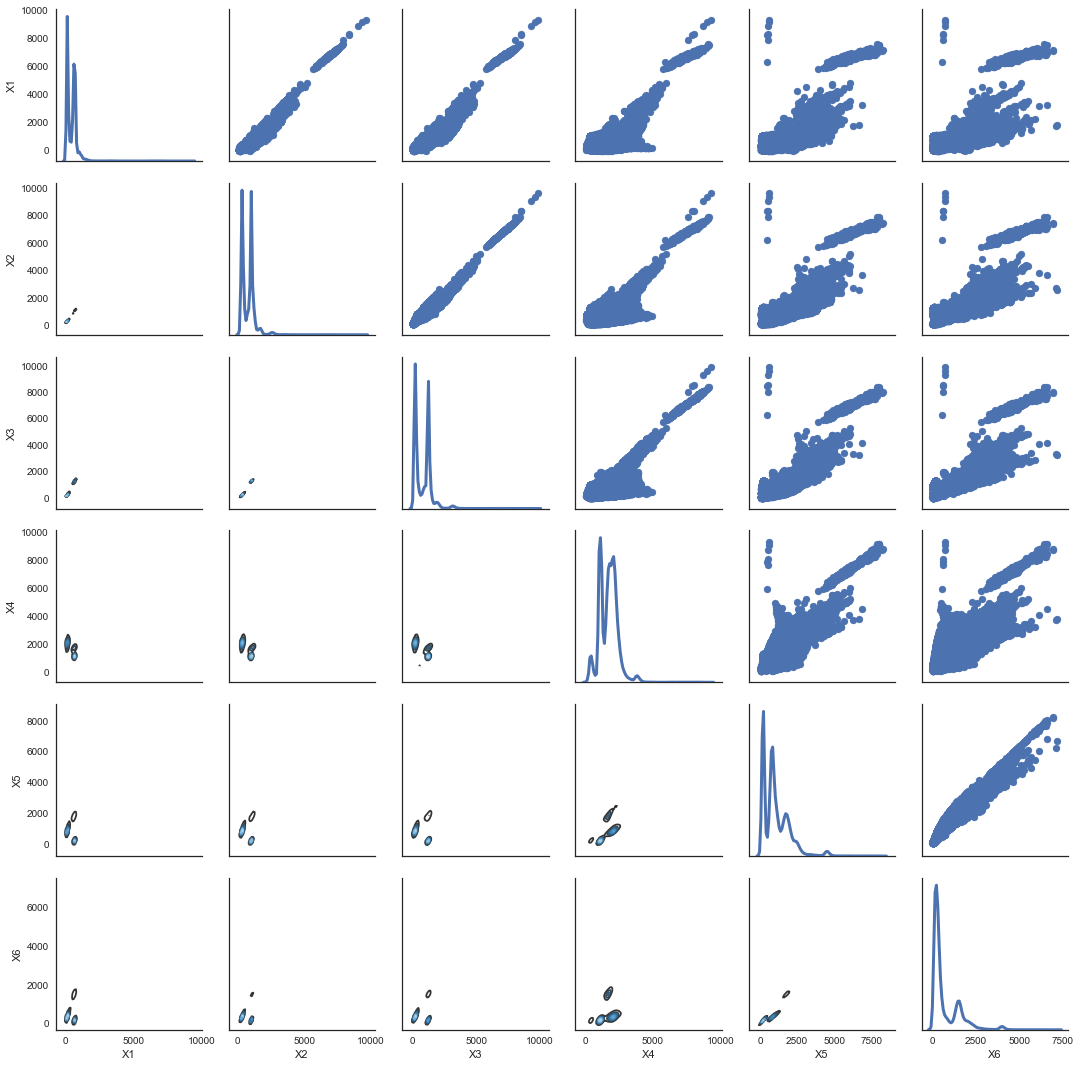

In [10]:
sns.set(style="white")
df = train.loc[:,['X1','X2','X3','X4','X5','X6']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

### Pair Plot between ('I1' , 'I2' , 'I3' , 'I4' , 'I5' , 'I6')

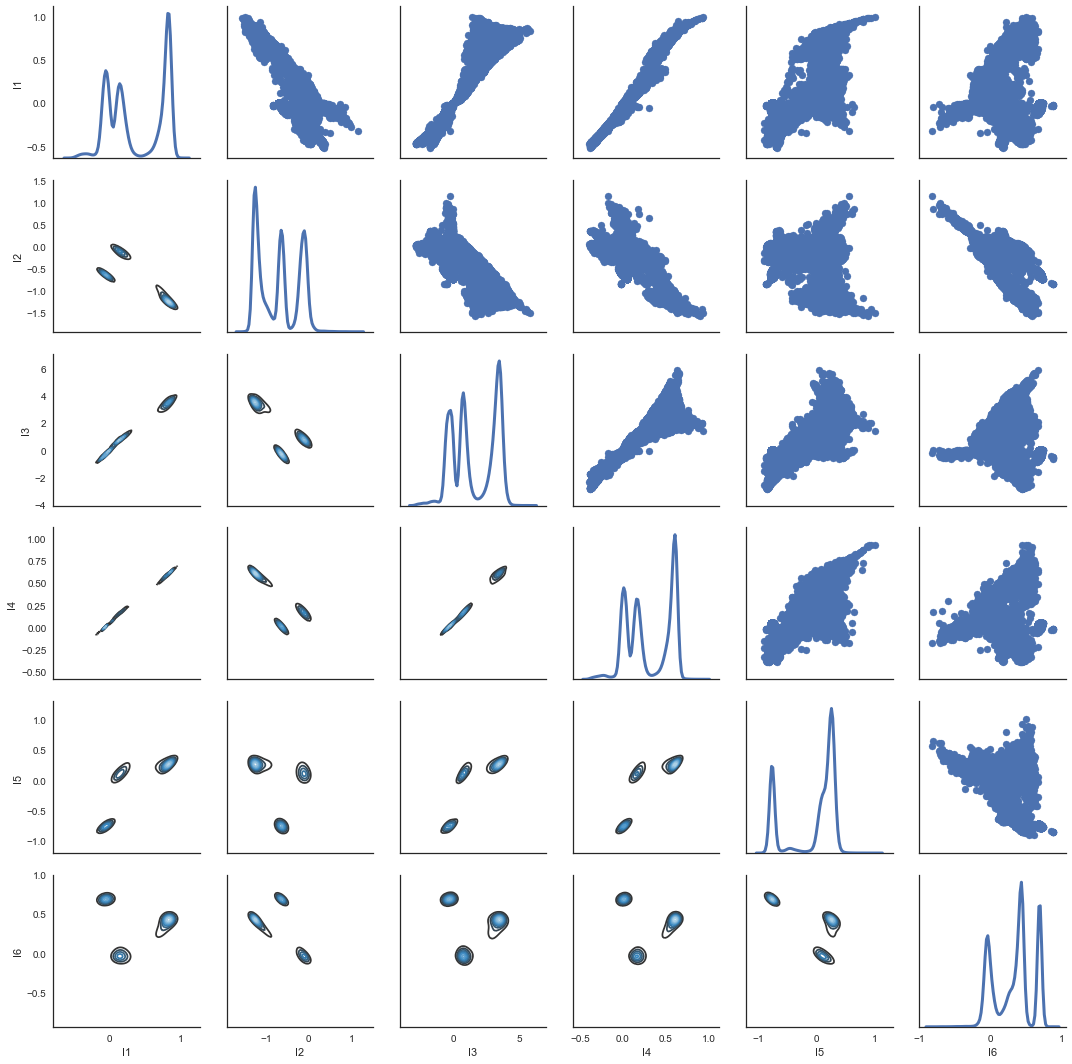

In [12]:
sns.set(style="white")
df = train.loc[:,['I1','I2','I3','I4','I5','I6']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

### HeatMap 

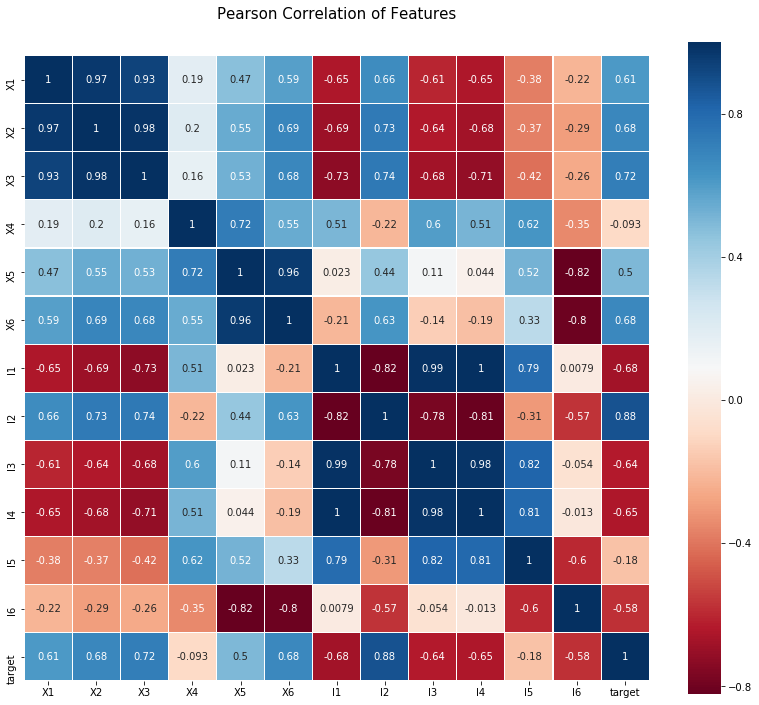

In [203]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

### Grouping together features whose pearson correlation value >0.90 or <-0.90 . Threshold value = 0.90 is taken here

In [15]:
# We have taken threshold value of 0.9

corrMatrix = train.corr()
l = train.columns
correlation_list = []

i = 0
while (i<len(l)):
    corr_l = []
    corr_l.append(l[i])
    for j in range(i+1,len(l)):
        if(corrMatrix[l[i]][l[j]]>0.90 or corrMatrix[l[i]][l[j]] < -0.90):
            corr_l.append(l[j])
            i = j
    i = i+1
    correlation_list.append(corr_l)
    
print(correlation_list)   

[['X1', 'X2', 'X3'], ['X4'], ['X5', 'X6'], ['I1', 'I3', 'I4'], ['I5'], ['I6'], ['target']]


## Lets Try this method and see the performance of the model. 

## Lets  make a new dataset after taking only one feature among these correlated features.

## Question is How to select the best feature among these correlated features:

### We have used Mutual Information to select the best feature which is more dependant on target variable.

#### Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

## Ohh!! Lets do one thing first. Splitting Training Data into x and y where :

## x : Features
## y : Target Variable

## After that, standardize the x features as we saw above that :
#### mean value, std , minimum value and maximum value is small in all I columns and very much larger in X Columns.


In [247]:
def standardization(d):
    return ((d-d.mean())/d.std())

In [248]:
x = train.drop(['target'],axis = 1)
y = train.target

In [249]:
x = standardization(x)

In [250]:
x.head(2)

,X1,X2,X3,X4,X5,X6,I1,I2,I3,I4,I5,I6
0,-0.426805,-1.037396,-1.036999,-1.781825,-1.000213,-0.783465,0.617036,-0.707535,-0.086081,0.287800,0.060487,0.356264
1,-0.398790,-1.054393,-1.053310,-1.969257,-1.069270,-0.816085,0.455133,-0.616705,-0.251027,0.075811,-0.128625,0.430071


### I1 is best among I1,I3,I4

In [25]:
x_l = x.loc[:,['I1','I3','I4']]
l_best= SelectKBest(mutual_info_classif, k=1).fit_transform(x_l, y)

In [26]:
l_best

array([[ 0.61703647],
       [ 0.45513281],
       [ 0.45213518],
       ..., 
       [-0.58407898],
       [-0.52282587],
       [-0.47107014]])

### X3 is best among X1,X2,X3

In [28]:
x_l = x.loc[:,['X1','X2','X3']]
l_best= SelectKBest(mutual_info_classif, k=1).fit_transform(x_l, y)

In [29]:
l_best

array([[-1.0369993 ],
       [-1.05330956],
       [-1.13782635],
       ..., 
       [ 0.56288875],
       [ 0.43388944],
       [ 0.3538209 ]])

### X6 seems to be the best among X5,X6

In [30]:
x_l = x.loc[:,['X5','X6']]
l_best= SelectKBest(mutual_info_classif, k=1).fit_transform(x_l, y)

In [31]:
l_best

array([[-0.78346543],
       [-0.81608524],
       [-0.87128799],
       ..., 
       [ 0.87136246],
       [ 0.91150992],
       [ 0.96922188]])

### Remove correlated features

### After Removing features we get : X3 , X4 , X6 , I1 , I2 , I5 , I6

In [204]:
xt = x.drop(['X1','X2','X5','I3','I4'],axis = 1)
xt.head()

,X3,X4,X6,I1,I2,I5,I6
0,-1.036999,-1.781825,-0.783465,0.617036,-0.707535,0.060487,0.356264
1,-1.053310,-1.969257,-0.816085,0.455133,-0.616705,-0.128625,0.430071
2,-1.137826,-2.261940,-0.871288,0.452135,-0.600443,-0.060210,0.405715
3,-1.106689,-1.931770,-0.822358,0.814042,-0.926948,0.277127,0.458567
4,-1.066654,-1.486258,-0.764646,0.961374,-1.106528,0.420315,0.562404


## Now Lets see The Distribution Percentage of Target Variable : y

## Observations

- Percentage of 1 : 45.4545454545
- Percentage of 2 : 27.2727272727
- Percentage of 3 : 18.1818181818
- Percentage of 4 : 9.09090909091

### There is imbalanced distribution in the dataset.

### We must handle this to get best model performance.

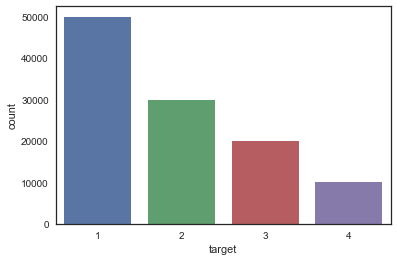

In [33]:
ax = sns.countplot(y,label = "Count")

In [34]:
def distributionPercentage(target_value):
    return float(float((train['target'] == target_value).sum())/train['target'].value_counts().sum())*100 

In [35]:
print ("Percentage of 1 : " + str(distributionPercentage(1)))
print ("Percentage of 2 : " + str(distributionPercentage(2)))
print ("Percentage of 3 : " + str(distributionPercentage(3)))
print ("Percentage of 4 : " + str(distributionPercentage(4)))

Percentage of 1 : 45.4545454545
Percentage of 2 : 27.2727272727
Percentage of 3 : 18.1818181818
Percentage of 4 : 9.09090909091


## Train-Test Split

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
X_train , X_test, y_train, y_test = train_test_split(xt, y, test_size=0.3, random_state=0)

## To Handle Imbalanced Distribution of Target Variable :

## We fill be using oversampling technique known as SMOTE

In [207]:
from imblearn.over_sampling import SMOTE

In [208]:
os = SMOTE(random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

## Finally We Will Now Train The Model

------------------------------------------------------
### Observations : 

-------------------------------------------------------

#### Logistic Regression : 
- Accuracy : Training Accuracy ( 89 % ) , Testing Accuracy (89 % ) 
- Precision (Test Set) : 0.90 
- Recall (Test Set):  0.89
- F1 Score ( weighted ) (Test Set): 0.89

#### SVM : 

- Accuracy : Training Accuracy ( 91 % ) , Testing Accuracy (91 % ) 
- Precision (Test Set): 0.92
- Recall (Test Set): 0.91
- F1 Score ( weighted ) (Test Set): 0.92


#### XGBoost : 

- Accuracy : Training Accuracy (96.22 % ) , Testing Accuracy (96.07 % ) 
- F1 Score ( weighted )(Test Set) :  0.9612

In [209]:
from sklearn.linear_model import LogisticRegression

In [210]:
logreg = LogisticRegression()
logreg.fit(os_data_X,os_data_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [211]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.89


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[14935     1    22    29]
 [    0  8960     6    54]
 [   27     6  3596  2369]
 [    1     4  1142  1848]]


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     14987
           2       1.00      0.99      1.00      9020
           3       0.75      0.60      0.67      5998
           4       0.43      0.62      0.51      2995

   micro avg       0.89      0.89      0.89     33000
   macro avg       0.80      0.80      0.79     33000
weighted avg       0.90      0.89      0.89     33000



### SVM

In [212]:
from sklearn import svm

In [213]:
svmModel= svm.SVC(kernel='linear')
svmModel.fit(os_data_X,os_data_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
y_pred = svmModel.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svmModel.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.91


In [214]:
print('Accuracy of SVM classifier on train set: {:.2f}'.format(svmModel.score(X_train, y_train)))

Accuracy of SVM classifier on train set: 0.91


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     14987
           2       1.00      1.00      1.00      9020
           3       0.77      0.76      0.77      5998
           4       0.54      0.55      0.54      2995

   micro avg       0.91      0.91      0.91     33000
   macro avg       0.83      0.83      0.83     33000
weighted avg       0.92      0.91      0.92     33000



### XGBoost

In [26]:
from xgboost import XGBClassifier

In [215]:
modelXG = XGBClassifier()
modelXG.fit(os_data_X,os_data_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [216]:
from sklearn.metrics import accuracy_score
y_pred = modelXG.predict(X_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.22%


In [28]:
from sklearn.metrics import accuracy_score
y_pred = modelXG.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.07%


In [31]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')  

0.96126884958029146

# Note Very Important Thing :

- We have just removed the correlated features from the dataset . But we should not just remove the features directly from the dataset as there will be loss of information which they will provide the model to classify.

- Instead just removing the features from the dataset. We should train the model with L2 penalty keeping all the correalted features in the dataset. This is the best practises to train the model with correlated features.


In [32]:
x.head()

,X1,X2,X3,X4,X5,X6,I1,I2,I3,I4,I5,I6
0,-0.426805,-1.037396,-1.036999,-1.781825,-1.000213,-0.783465,0.617036,-0.707535,-0.086081,0.287800,0.060487,0.356264
1,-0.398790,-1.054393,-1.053310,-1.969257,-1.069270,-0.816085,0.455133,-0.616705,-0.251027,0.075811,-0.128625,0.430071
2,-0.585554,-1.186596,-1.137826,-2.261940,-1.157894,-0.871288,0.452135,-0.600443,-0.478381,-0.015812,-0.060210,0.405715
3,-0.587889,-1.126160,-1.106689,-1.931770,-1.061214,-0.822358,0.814042,-0.926948,-0.115153,0.499814,0.277127,0.458567
4,-0.580885,-1.056282,-1.066654,-1.486258,-0.948420,-0.764646,0.961374,-1.106528,0.227060,0.765678,0.420315,0.562404


### Train-Test Split

In [217]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### To Handle Imbalanced Distribution of Target Variable :

### We fill be using oversampling technique known as SMOTE

In [218]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

## Finally We Will Now Train The Model
-------------------------------------------------------------------------

### Observations : 
--------------------------------------------------------------------------

#### Logistic Regression

- Accuracy : Training Accuracy ( 93 % ) , Testing Accuracy (94 % ) 
- Precision (Test Set) : 0.94
- Recall (Test Set): 0.94
- F1 Score ( weighted ) (Test Set) : 0.94

#### SVM

- Accuracy : Training Accuracy (94 % ) , Testing Accuracy (94 % ) 
- Precision (Test Set): 0.95
- Recall (Test Set): 0.94
- F1 Score ( weighted ) (Test Set):  0.94

#### XGBoost

- Accuracy : Training Accuracy ( 96.92% ) , Testing Accuracy ( 96.79% ) 
- F1 Score ( weighted ) (Test Set):  0.9683



In [35]:
from sklearn.linear_model import LogisticRegression

In [219]:
logreg = LogisticRegression()
logreg.fit(os_data_X,os_data_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [221]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on test set: 0.93


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[14943     0     6    38]
 [    0  8998     3    19]
 [   16     6  4617  1359]
 [    2     1   655  2337]]


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     14987
           2       1.00      1.00      1.00      9020
           3       0.87      0.77      0.82      5998
           4       0.62      0.78      0.69      2995

   micro avg       0.94      0.94      0.94     33000
   macro avg       0.87      0.89      0.88     33000
weighted avg       0.94      0.94      0.94     33000



### SVM

In [40]:
from sklearn import svm

In [222]:
svmModel= svm.SVC(kernel='linear')
svmModel.fit(os_data_X,os_data_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [42]:
y_pred = svmModel.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svmModel.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.94


In [44]:
print('Accuracy of SVM classifier on train set: {:.2f}'.format(svmModel.score(X_train, y_train)))

Accuracy of SVM classifier on train set: 0.94


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     14987
           2       1.00      1.00      1.00      9020
           3       0.89      0.78      0.83      5998
           4       0.65      0.80      0.72      2995

   micro avg       0.94      0.94      0.94     33000
   macro avg       0.88      0.90      0.89     33000
weighted avg       0.95      0.94      0.94     33000



### XGBoost

In [45]:
from xgboost import XGBClassifier

In [223]:
modelXG = XGBClassifier()
modelXG.fit(os_data_X,os_data_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [47]:
from sklearn.metrics import accuracy_score
y_pred = modelXG.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.79%


In [224]:
from sklearn.metrics import accuracy_score
y_pred = modelXG.predict(X_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.92%


In [48]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')  

0.96837357974149263

### Drawing Plot Importance Graph :

#### This Shows us that I1 is most important feature of all. Wow !!!

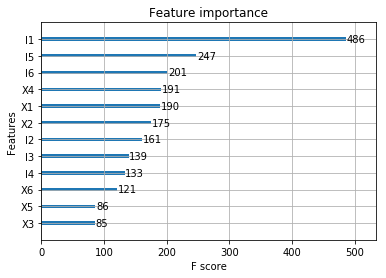

In [50]:
from xgboost import plot_importance
plot_importance(modelXG)

## Till Now we have done visualization , Preprocessing , Trained model and seen their performance. But One Thing we have left :

### Seeing the Outliers : 

### We will draw Box Plot to see outliers are present or not.
-----------------------------------------------------------------------------------



### Observations : 
---------------------------------------------------
#### X1 , X2 , X3 , X4 , X5 , X6 , I6 contains Outliers.

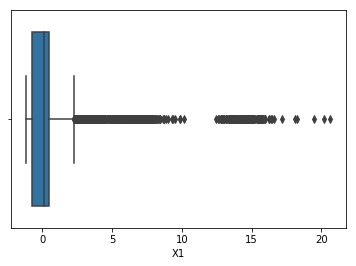

In [51]:
sns.boxplot(x=x['X1'])

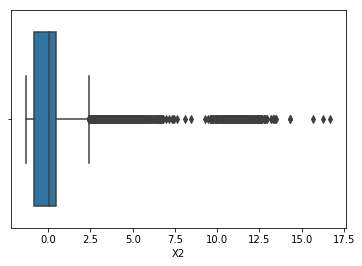

In [64]:
sns.boxplot(x=x['X2'])

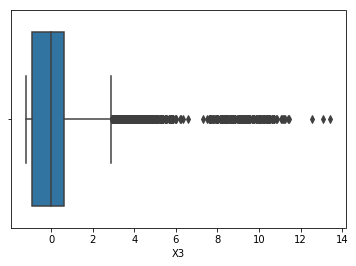

In [65]:
sns.boxplot(x=x['X3'])

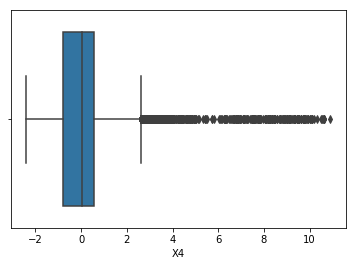

In [66]:
sns.boxplot(x=x['X4'])

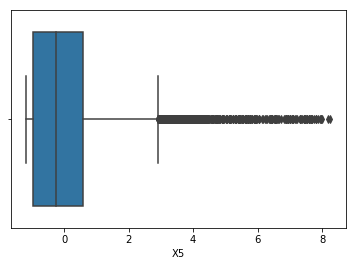

In [67]:
sns.boxplot(x=x['X5'])

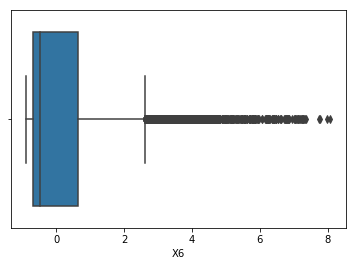

In [68]:
sns.boxplot(x=x['X6'])

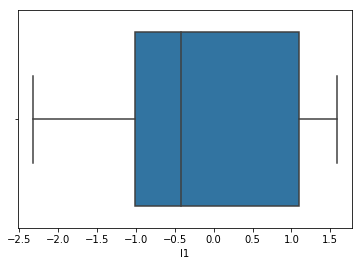

In [69]:
sns.boxplot(x=x['I1'])

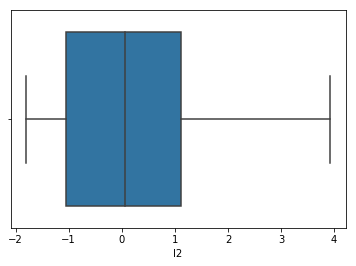

In [70]:
sns.boxplot(x=x['I2'])

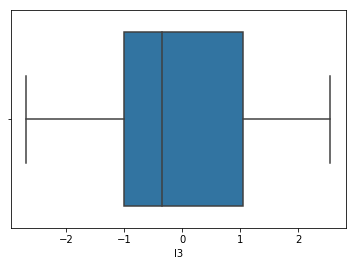

In [71]:
sns.boxplot(x=x['I3'])

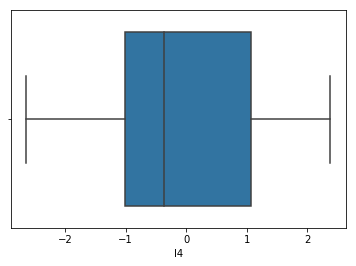

In [72]:
sns.boxplot(x=x['I4'])

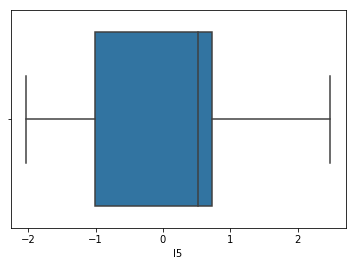

In [73]:
sns.boxplot(x=x['I5'])

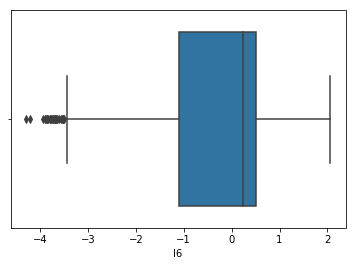

In [74]:
sns.boxplot(x=x['I6'])

### Calculate IQR (Inter Quartile Range) for each features

In [251]:
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

X1    1.230310
X2    1.301252
X3    1.521302
X4    1.353838
X5    1.548037
X6    1.323611
I1    2.109008
I2    2.168709
I3    2.053542
I4    2.079369
I5    1.734665
I6    1.594675
dtype: float64


In [252]:
print ("No. of Outliers present : " + str(len(x) - (~((x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR))).any(axis=1)).sum()))

No. of Outliers present : 2975


### Removing the outliers present 

In [253]:
xOut = x[~((x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR))).any(axis=1)]
yOut = y[~((x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR))).any(axis=1)]

In [254]:
xOut.shape

(107025, 12)

In [255]:
xOut.head()

,X1,X2,X3,X4,X5,X6,I1,I2,I3,I4,I5,I6
0,-0.426805,-1.037396,-1.036999,-1.781825,-1.000213,-0.783465,0.617036,-0.707535,-0.086081,0.287800,0.060487,0.356264
1,-0.398790,-1.054393,-1.053310,-1.969257,-1.069270,-0.816085,0.455133,-0.616705,-0.251027,0.075811,-0.128625,0.430071
2,-0.585554,-1.186596,-1.137826,-2.261940,-1.157894,-0.871288,0.452135,-0.600443,-0.478381,-0.015812,-0.060210,0.405715
3,-0.587889,-1.126160,-1.106689,-1.931770,-1.061214,-0.822358,0.814042,-0.926948,-0.115153,0.499814,0.277127,0.458567
4,-0.580885,-1.056282,-1.066654,-1.486258,-0.948420,-0.764646,0.961374,-1.106528,0.227060,0.765678,0.420315,0.562404


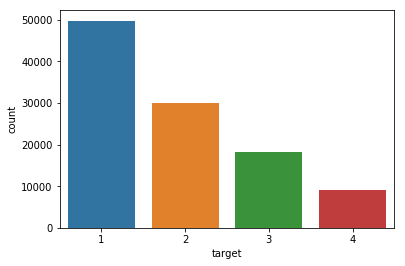

In [91]:
ax = sns.countplot(yOut,label = "Count")

## Now Dataset is cleaned from Outliers.

## Its Time to train the model and see their performance on this dataset.

---------------------------------------------------------------------------------------------



### Observations : 
---------------------------------------------------------------------------------------------

#### We find out that there is an increment in the model performance after removing the outliers. Nice !!

#### Logistic Regression : 
 
 - Accuracy :   Training Set ( 94% ) and Testing Set( 94% )
 - Precision(weighted) : Testing Set ( 0.95 )
 - Recall(weighted) : Testing Set ( 0.94 )
 - F1 Score(weighted) : Testing Set ( 0.94 )


#### SVM : 

 - Accuracy : Training Set ( 94% ) and Testing Set( 94% )
 - Precision(weighted) : Testing Set( 0.95 )
 - Recall(weighted) : Testing Set( 0.94 )
 - F1 Score(weighted) : Testing Set( 0.95 )


#### XGBoost : 

 - Accuracy : Training Set ( 97.10% ) and Testing Set( 96.87% )
 - F1 Score(weighted) : Testing Set( 0.9691 )


In [132]:
xOut.head()

,X1,X2,X3,X4,X5,X6,I1,I2,I3,I4,I5,I6
0,-0.426805,-1.037396,-1.036999,-1.781825,-1.000213,-0.783465,0.617036,-0.707535,-0.086081,0.287800,0.060487,0.356264
1,-0.398790,-1.054393,-1.053310,-1.969257,-1.069270,-0.816085,0.455133,-0.616705,-0.251027,0.075811,-0.128625,0.430071
2,-0.585554,-1.186596,-1.137826,-2.261940,-1.157894,-0.871288,0.452135,-0.600443,-0.478381,-0.015812,-0.060210,0.405715
3,-0.587889,-1.126160,-1.106689,-1.931770,-1.061214,-0.822358,0.814042,-0.926948,-0.115153,0.499814,0.277127,0.458567
4,-0.580885,-1.056282,-1.066654,-1.486258,-0.948420,-0.764646,0.961374,-1.106528,0.227060,0.765678,0.420315,0.562404


### Train-Test Split

In [256]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(xOut, yOut, test_size=0.3, random_state=0)

### To Handle Imbalanced Distribution of Target Variable :

### We fill be using oversampling technique known as SMOTE

In [257]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

### Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression

In [95]:
logreg = LogisticRegression()
logreg.fit(os_data_X,os_data_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [96]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [97]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on test set: 0.94


In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[14862     0     7    41]
 [    0  9037     3    12]
 [   23     9  4182  1277]
 [    4     1   530  2120]]


In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     14910
           2       1.00      1.00      1.00      9052
           3       0.89      0.76      0.82      5491
           4       0.61      0.80      0.69      2655

   micro avg       0.94      0.94      0.94     32108
   macro avg       0.87      0.89      0.88     32108
weighted avg       0.95      0.94      0.94     32108



### SVM

In [100]:
from sklearn import svm

In [101]:
svmModel= svm.SVC(kernel='linear')
svmModel.fit(os_data_X,os_data_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [103]:
y_pred = svmModel.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(svmModel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [104]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(svmModel.score(X_train, y_train)))

Accuracy of logistic regression classifier on test set: 0.94


In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[14863     0    20    27]
 [    0  9052     0     0]
 [   28     2  4267  1194]
 [    9     0   491  2155]]


In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     14910
           2       1.00      1.00      1.00      9052
           3       0.89      0.78      0.83      5491
           4       0.64      0.81      0.71      2655

   micro avg       0.94      0.94      0.94     32108
   macro avg       0.88      0.90      0.89     32108
weighted avg       0.95      0.94      0.95     32108



### XGBoost

In [107]:
from xgboost import XGBClassifier

In [108]:
modelXG = XGBClassifier()
modelXG.fit(os_data_X,os_data_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [109]:
from sklearn.metrics import accuracy_score
y_pred = modelXG.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(" Testing Accuracy: %.2f%%" % (accuracy * 100.0))

 Testing Accuracy: 96.87%


In [110]:
from sklearn.metrics import accuracy_score
y_pred = modelXG.predict(X_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train, predictions)
print("Training Accuracy: %.2f%%" % (accuracy * 100.0))

Training Accuracy: 97.10%


In [112]:
from sklearn.metrics import f1_score
y_pred = modelXG.predict(X_test)
f1_score(y_test, y_pred, average='weighted')  

0.96913237140209663

### Finally we have preprocessed the dataset appropriately and evaluated the performance of the model on the preprocessed dataset.

### Now it's time to enhance the performance of our model.
-------------------------------------------------------------------------------------------------------

### We will be using very famous Ensembling Technique ( Stacking ) 

### Description of My Stacked Model.

- It contains 2 layers.
- First Layer consists of 3 models : Logistic Regression , SVM , GradientBoostingClassifier.
- Second Layer consists of 1 model : XGBoost.

---------------------------------------------------------------------------------------------------------
### Observations
---------------------------------------------------------------------------------------------------------
#### This model outperforms previous models for this dataset.

#### Accuracy : 97.14%
#### F1 Score : 0.9717

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier

In [169]:
ntrain = os_data_X.shape[0]
ntest = X_test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(n_splits= NFOLDS, random_state=SEED)
kf.get_n_splits(os_data_X)

5

In [179]:
def get_oof(clf, x_train, y_train,x_test):
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    oof_train = np.zeros((ntrain,))
    
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))
    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        print("TRAIN:", train_index, "TEST:", test_index)
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        clf.fit(x_tr, y_tr)
        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)
        
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)      

In [196]:
logreg = LogisticRegression()
svmModel= svm.SVC(kernel='linear')
gbc = GradientBoostingClassifier()

In [181]:
len(os_data_X)

139556

In [198]:
gb_oof_train, gb_oof_test = get_oof(gbc,os_data_X,os_data_y,X_test) # Gradient Boost Classifier
et_oof_train, et_oof_test = get_oof(logreg,os_data_X,os_data_y,X_test) # Logistic Regression
rf_oof_train, rf_oof_test = get_oof(svmModel,os_data_X,os_data_y,X_test) # SVM
print("Training is complete")

('TRAIN:', array([ 27912,  27913,  27914, ..., 139553, 139554, 139555]), 'TEST:', array([    0,     1,     2, ..., 27909, 27910, 27911]))
('TRAIN:', array([     0,      1,      2, ..., 139553, 139554, 139555]), 'TEST:', array([27912, 27913, 27914, ..., 55820, 55821, 55822]))
('TRAIN:', array([     0,      1,      2, ..., 139553, 139554, 139555]), 'TEST:', array([55823, 55824, 55825, ..., 83731, 83732, 83733]))
('TRAIN:', array([     0,      1,      2, ..., 139553, 139554, 139555]), 'TEST:', array([ 83734,  83735,  83736, ..., 111642, 111643, 111644]))
('TRAIN:', array([     0,      1,      2, ..., 111642, 111643, 111644]), 'TEST:', array([111645, 111646, 111647, ..., 139553, 139554, 139555]))
('TRAIN:', array([ 27912,  27913,  27914, ..., 139553, 139554, 139555]), 'TEST:', array([    0,     1,     2, ..., 27909, 27910, 27911]))
('TRAIN:', array([     0,      1,      2, ..., 139553, 139554, 139555]), 'TEST:', array([27912, 27913, 27914, ..., 55820, 55821, 55822]))
('TRAIN:', array([    

In [199]:
x_train = np.concatenate(( et_oof_train, rf_oof_train,gb_oof_train), axis=1)
x_test = np.concatenate(( et_oof_test, rf_oof_test , gb_oof_test), axis=1)

In [200]:
gbm = XGBClassifier().fit(x_train, os_data_y)
y_pred = gbm.predict(x_test)

In [201]:
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Testing Accuracy: %.2f%%" % (accuracy * 100.0))

Testing Accuracy: 97.14%


In [202]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted') 

0.97174490950203984

# Submission For Test File

In [226]:
test = pd.read_csv('./socialcops_challenge/land_test.csv')

In [227]:
test.head()

,X1,X2,X3,X4,X5,X6,I1,I2,I3,I4,I5,I6
0,338,554,698,1605,1752,1310,0.393834,-0.350045,1.565423,0.311659,0.304781,-0.043789
1,667,976,1187,1834,1958,1653,0.214167,-0.181467,1.050679,0.196439,0.164085,-0.032700
2,249,420,402,1635,1318,736,0.605302,-0.712650,2.268984,0.441984,0.293497,0.107348
3,111,348,279,1842,743,328,0.736917,-1.162062,3.074176,0.551699,0.080725,0.425145
4,349,559,642,1534,1544,989,0.409926,-0.406678,1.607795,0.323984,0.212753,-0.003249


In [229]:
def standardization(d):
    return ((d-d.mean())/d.std())

In [230]:
test = standardization(test)

In [233]:
test.shape

(2000000, 12)

# Note
#### In Test File there are 20,00,000 rows which takes very much time even to load it.
#### I will just take first 2,00,000 rows of data to make predictions. 
#### I can also use colab for this, But I start this task on my laptop so I can't shift to the colab.

In [237]:
test = test[:200000]

In [238]:
test.shape

(200000, 12)

In [239]:
test.head()

,X1,X2,X3,X4,X5,X6,I1,I2,I3,I4,I5,I6
0,-0.563115,-0.508952,-0.063934,-0.469051,0.015694,0.255266,-0.209292,0.355950,-0.328541,-0.162519,0.608883,-0.473931
1,1.695183,2.128496,1.909805,0.102659,0.403796,1.007652,-1.300582,0.938480,-1.030566,-1.228765,-0.713629,-0.397269
2,-1.174022,-1.346436,-1.258672,-0.394154,-0.801958,-1.003828,1.075158,-0.897051,0.631001,1.043511,0.502821,0.570964
3,-2.121271,-1.796427,-1.755134,0.122632,-1.885252,-1.898794,1.874581,-2.450015,1.729150,2.058820,-1.497189,2.768064
4,-0.487609,-0.477703,-0.289966,-0.646306,-0.376176,-0.448861,-0.111547,0.160254,-0.270752,-0.048458,-0.256157,-0.193654


In [258]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier


ntrain = os_data_X.shape[0]
ntest = test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(n_splits= NFOLDS, random_state=SEED)
kf.get_n_splits(os_data_X)


def get_oof(clf, x_train, y_train,x_test):
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    oof_train = np.zeros((ntrain,))
    
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))
    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        print("TRAIN:", train_index, "TEST:", test_index)
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        clf.fit(x_tr, y_tr)
        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)
        
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)      

In [259]:
logreg = LogisticRegression()
svmModel= svm.SVC(kernel='linear')
gbc = GradientBoostingClassifier()

In [260]:
gb_oof_train, gb_oof_test = get_oof(gbc,os_data_X,os_data_y,test) # Gradient Boost Classifier
et_oof_train, et_oof_test = get_oof(logreg,os_data_X,os_data_y,test) # Logistic Regression
rf_oof_train, rf_oof_test = get_oof(svmModel,os_data_X,os_data_y,test) # SVM
print("Training is complete")

('TRAIN:', array([ 27912,  27913,  27914, ..., 139553, 139554, 139555]), 'TEST:', array([    0,     1,     2, ..., 27909, 27910, 27911]))
('TRAIN:', array([     0,      1,      2, ..., 139553, 139554, 139555]), 'TEST:', array([27912, 27913, 27914, ..., 55820, 55821, 55822]))
('TRAIN:', array([     0,      1,      2, ..., 139553, 139554, 139555]), 'TEST:', array([55823, 55824, 55825, ..., 83731, 83732, 83733]))
('TRAIN:', array([     0,      1,      2, ..., 139553, 139554, 139555]), 'TEST:', array([ 83734,  83735,  83736, ..., 111642, 111643, 111644]))
('TRAIN:', array([     0,      1,      2, ..., 111642, 111643, 111644]), 'TEST:', array([111645, 111646, 111647, ..., 139553, 139554, 139555]))
('TRAIN:', array([ 27912,  27913,  27914, ..., 139553, 139554, 139555]), 'TEST:', array([    0,     1,     2, ..., 27909, 27910, 27911]))
('TRAIN:', array([     0,      1,      2, ..., 139553, 139554, 139555]), 'TEST:', array([27912, 27913, 27914, ..., 55820, 55821, 55822]))
('TRAIN:', array([    

In [261]:
x_train = np.concatenate(( et_oof_train, rf_oof_train,gb_oof_train), axis=1)
x_test = np.concatenate(( et_oof_test, rf_oof_test , gb_oof_test), axis=1)

In [262]:
gbm = XGBClassifier().fit(x_train, os_data_y)
y_pred = gbm.predict(x_test)

In [266]:
y_pred

array([3, 2, 1, ..., 2, 3, 2])

In [265]:
df = test
df['target'] = y_pred
df.to_csv('Submit.csv' , index = False)

# Thank You